<a href="https://colab.research.google.com/github/MamousMed/CheckpointPy/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving titanic-passengers.csv to titanic-passengers.csv


{'titanic-passengers.csv': b'PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked\n343;No;2;Collander, Mr. Erik Gustaf;male;28.0;0;0;248740;13.0;;S\n76;No;3;Moen, Mr. Sigurd Hansen;male;25.0;0;0;348123;7.65;F G73;S\n641;No;3;Jensen, Mr. Hans Peder;male;20.0;0;0;350050;7.8542000000000005;;S\n568;No;3;Palsson, Mrs. Nils (Alma Cornelia Berglund);female;29.0;0;4;349909;21.075;;S\n672;No;1;Davidson, Mr. Thornton;male;31.0;1;0;F.C. 12750;52.0;B71;S\n105;No;3;Gustafsson, Mr. Anders Vilhelm;male;37.0;2;0;3101276;7.925;;S\n576;No;3;Patchett, Mr. George;male;19.0;0;0;358585;14.5;;S\n382;Yes;3;"Nakid, Miss. Maria (""Mary"")";female;1.0;0;2;2653;15.7417;;C\n228;No;3;"Lovell, Mr. John Hall (""Henry"")";male;20.5;0;0;A/5 21173;7.25;;S\n433;Yes;2;Louch, Mrs. Charles Alexander (Alice Adelaide Slow);female;42.0;1;0;SC/AH 3085;26.0;;S\n135;No;2;Sobey, Mr. Samuel James Hayden;male;25.0;0;0;C.A. 29178;13.0;;S\n294;No;3;Haas, Miss. Aloisia;female;24.0;0;0;349236;8.85;;S\n755;Yes;

In [ ]:
import pandas as pd
import numpy as np
dataset=pd.read_csv("titanic-passengers.csv", sep=";")
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,G6,S


In [65]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score 
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)   #fitting our model
y_pred=classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))


score:0.7653631284916201


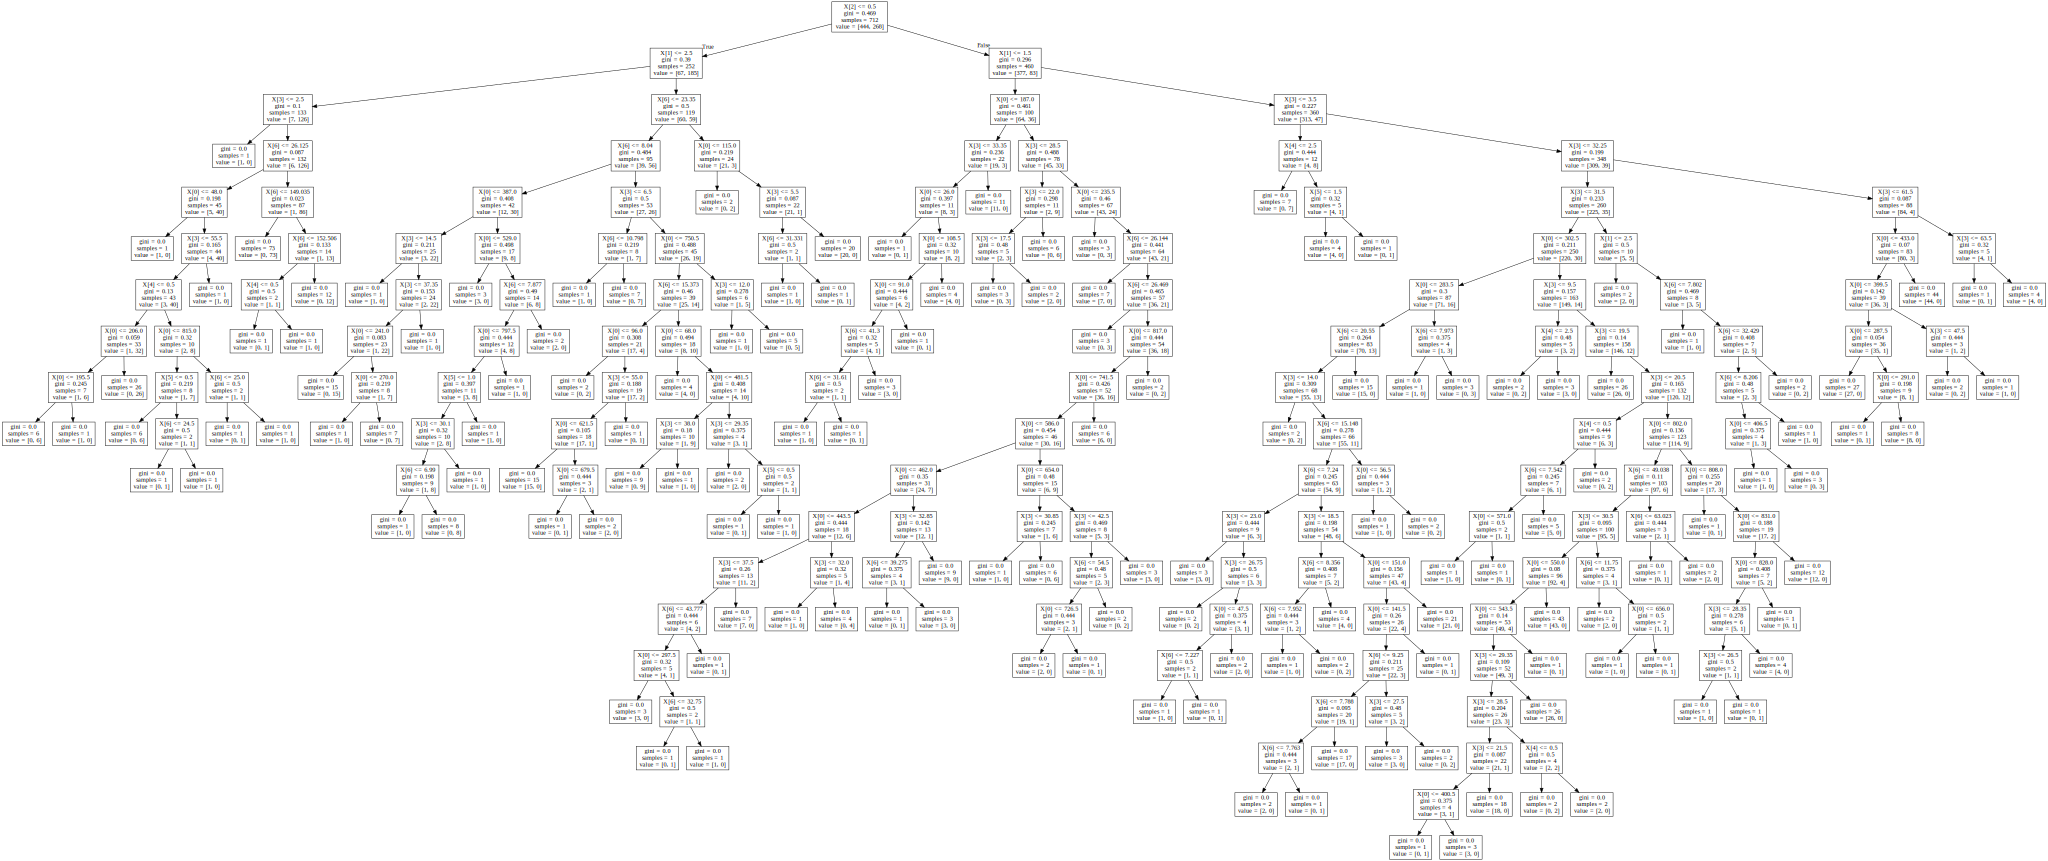

In [ ]:
import graphviz 
dot_data=tree.export_graphviz(classifier,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

The tree starts with the Sex feature.
If the sex is female it will start  looking at the Pclass feature and next the age feature and continue this way until it arrives to a conclusion of all the predictions

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score 
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
classifier = DecisionTreeClassifier(criterion='entropy')  
classifier.fit(x_train, y_train)   #fitting our model
y_pred=classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


Lower accuracy when we change criterion to 'entropy'

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score 
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
classifier = DecisionTreeClassifier(max_depth=50)  
classifier.fit(x_train, y_train)   #fitting our model
y_pred=classifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


Better Accuracy when we increase max_depth to 50

In [56]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8324022346368715


In [61]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]
clf=RandomForestClassifier(n_estimators=15)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8603351955307262


Better accuracy when we increase the number of estimators to 15